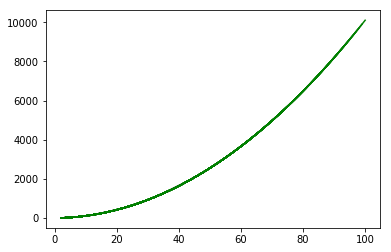

In [20]:
import random
import matplotlib.pyplot as plt
class Node:
    to = 0
    previous = None
    cost = 0
    color = "White"
    distance = 0
    finish = 0
    predecessor = None

class Graph:
    edges = []
    grades = []
    numNodes = 0
    numEdges = 0
    isDirected = False
    hasCost = False

        
def startGraph(g, MAXV):
    i = 0
    while i <= MAXV:
        g.grades.append(0)
        i += 1
    i = 0
    while i <= MAXV:
        g.edges.append(None)
        i += 1

        
def insertEdge(g,u,v,cost,isDirected):
    item = Node()
    item.to = v
    item.previous = g.edges[u]
    item.cost = cost
    g.edges[u] = item
    g.grades [u] += 1
    if isDirected == False and v != u:
        insertEdge(g,v,u,cost, True)
    else:
        g.numEdges += 1

       
def printGraph(g):
    i=1
    item =  None
    string = ""
    while i<=g.numNodes:
        string += str(i) + "\t"
        item = g.edges[i]
        while item != None:
            string += str(item.to) + " : " + str(item.cost) + "\t"
            item = item.previous
        string += "\n"
        i += 1
    print(string)
    

colors = []
predecessors = []
distances = []
finishes = []

# Depth First Search algorithm
def depthFirstSearch(g):
    global yiteraciones
    global times
    for u in range(g.numNodes+1):
            yiteraciones=yiteraciones+1
            colors.append("White")
            predecessors.append(None)
            distances.append(0)
            finishes.append(0)
    times = 0
    for u in range(g.numNodes):
        yiteraciones=yiteraciones+1
        if u > 0:
            if colors[u] == "White":
                visit(u)
    while colors !=[]:
        colors.pop(0)
    while predecessors !=[]:
        predecessors.pop(0)
    while distances !=[]:
        distances.pop(0)
    while finishes != []:
        finishes.pop(0)
     
    
    
# Function that visits all adjacent nodes to a node U
def visit(u):
    global times
    global yiteraciones

    colors[u] = "Gray"
    times += 1
    distances[u] = times
    # print("U " + str(u))
    # print(colors[u])
    v = g.edges[u]
    while v != None:
        yiteraciones += 1
        V = v.to
        if colors[V] == "White":
            predecessors[V] = u
            visit(V)
        v = v.previous

    colors[u] = "Black"
    times = times + 1
    finishes[u] = times

 
 
def createWorstCase(g):
    n=g.numNodes
   # print("PARA NUMERO DE NODOS :",n)
    g.numEdges=n-1
    listaU=[]
    listaV=[] 
    listaUV=[]
    for i in range(1,n):
        listaU.append(i)
    for i in range(2,n+1):
        listaV.append(i)
        
    while listaV!=[]:
        i=0
        while i<len(listaU):
            t=0
            while t<len(listaU):
                listaUV.append(listaU[i])
                listaUV.append(listaV[t])
                listaUV.append(random.randint(1,500))
                t=t+1
            listaU.pop(0) 
            listaV.pop(0)
        i=i+1      
    k = 0
    u = 0
    v = 0
    costo = 0
    while k < len(listaUV):
        u = listaUV[k]
        v = listaUV[k+1]
        if g.hasCost==True:
            cost = listaUV[k+2]
        else:
            cost=1   
        insertEdge(g,u,v,cost,g.isDirected)
        k=k+3
    
        
        

 
def main(n,g):
    g.isDirected = False
    g.hasCost =False
    g.numNodes = n
    startGraph(g, g.numNodes)
    createWorstCase(g)
    depthFirstSearch(g)
    
   


n=100
elementosx=[]
tiempoy=[]

g=Graph()    
for l in range(2,n+1):
    times=0
    yiteraciones=0
    main(l,g)
    
    g.edges = []
    g.grades = []
    g.numNodes = 0
    g.numEdges = 0
    g.isDirected = False
  
    
    elementosx.append(l)
    
    tiempoy.append(yiteraciones)
    plt.plot(elementosx,tiempoy,color="g")
    